## Modelo de predición de cancer de mama (Wisconsin uci)

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from random import random 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

max_noise = 30

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Importamos los datos desde el repositorio oficial
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
header=None)

In [3]:
# Vemos la estructura del dataframe
# Columna 0 --> ID
# Columna 1 --> Clase
# Columnas 2.. -> Datos
df[:2]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
# Separamos el dataset en (Conjunto de datos, Etiquetas)
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

In [5]:
# Separamos el conjunto total en dos subconjuntos (Train 80% / Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
weak_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)

In [7]:
# Creamos un flujo de trabajo (pipeline):
# Paso 1 -> Escalar los datos
# Paso 2 -> Analisis de componentes principales (Reduce la dimensionalidad)
# Paso 3 -> Construimos un modelo utilizando Regresión Logística


pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', XGBClassifier())])

# Ajustamos el modelo a los datos de entrenamiento
pipe_lr.fit(X_train, y_train)

#Calculamos la precisión del modelo utilizando los datos de test
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.939


In [8]:
# Como cambia el accuracy al aumentar el ruido:

In [9]:
def accuracy_noise_level(N, X_train, y_train, X_test, y_test):
    
    change = lambda x: 'M' if x == 'B' else 'B'
    def change_rand(N):
        return lambda x: change(x) if random() < N/100 else x
    
    y_train = list(map(change_rand(N), y_train))

    pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', XGBClassifier())])

    # Ajustamos el modelo a los datos de entrenamiento
    pipe_lr.fit(X_train, y_train)

    #Calculamos la precisión del modelo utilizando los datos de test
    return pipe_lr.score(X_test, y_test)

In [10]:
def accuracy_noise_level_robust(N, X_train, y_train, X_test, y_test):
    
    change = lambda x: 'M' if x == 'B' else 'B'
    def change_rand(N):
        return lambda x: change(x) if random() < N/100 else x
    
    y_train = list(map(change_rand(N), y_train))

    pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', XGBClassifier(gamma=5))])

    # Ajustamos el modelo a los datos de entrenamiento
    pipe_lr.fit(X_train, y_train)

    #Calculamos la precisión del modelo utilizando los datos de test
    return pipe_lr.score(X_test, y_test)

In [11]:
accuracy_noise_level(0, X_train, y_train, X_test, y_test)

0.9385964912280702

In [12]:
accuracy_noise_level(30, X_train, y_train, X_test, y_test)

0.7456140350877193

In [13]:
accuracies = [accuracy_noise_level(N, X_train, y_train, X_test, y_test) for N in range(max_noise)]

In [14]:
accuracies_robust = [accuracy_noise_level_robust(N, X_train, y_train, X_test, y_test) for N in range(max_noise)]

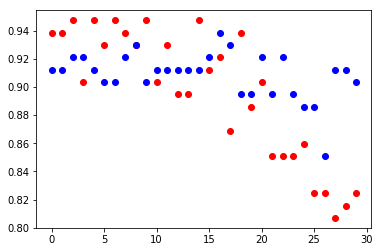

In [15]:
fig = plt.figure()
ax = plt.axes()

ax.plot(range(max_noise), accuracies, 'ro');
ax.plot(range(max_noise), accuracies_robust, 'bo');